### Quality ratings of Portuguese white wines

The goal is to model wine quality based on physicochemical tests and recommendations are made depending on the value of the wine quality.
The wine quality ranges from a value of 3 to 9 where a value of 3 can be interpeted as wine of poor quality and 9 indicates wine of best quality. Wine recommendations are made based on the value of the wine quality where a resulting quality value less than 7 is not recommended.

### Approach
* Supervised machine learning techniques are adopted in this task because a labeled data set had been provided.
* The goal is to learn or do a mapping between the given explanatory variables and the target variable.
* From the mapping, a relationship between the features and the target variable is established.
* This function is then used to make predcitions of the target variables when given a set of the explanatory variables.
* To improve on the perfomance model, measures are taken to mitigte the effect of the imbalance in the dataset set and feature selection is also used.
***
#### Steps
* Data preprocessing (cleaning and visualization)
* Train an SVM binary classifier.
* Make predictions with the classifier.
* Evaluate the performance of the model.
***

#### Other Packages used
* imblearn - installed with `pip install imblearn`.

In [1]:
##dealing with the imbalance nature of the data
##!pip install imblearn

In [2]:
# Import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve

import matplotlib.pyplot as plt
%matplotlib inline

#### Load the data set

In [3]:
# read the winequality data into the notebook
wine_quality_data = pd.read_csv("../../datasets/winequality.csv")

#### Exploratory data analysis (EDA)

EDA enables you to have a good understanding of what your data looks like. You could tell if there are missing values in your data, determine presence of anomalies, identify some patterns that can be useful for subsequent analysis and many more.
* By using the `df.head(n)`, the first n rows of the dataset are displayed and `df.tail(n)` displays the last n rows of tha dataset. By default, these functions return the first five rows and the last 5 rows respectively.
* `df.info()` gives you info about the data type for each column and the number of entries available for each column (you can the number of missing values).

In [4]:
wine_quality_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False


In [5]:
wine_quality_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,False
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,False
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,False
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,True
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,False


In [6]:
## distribution of the two classes in the data set in percentage.

print((wine_quality_data['recommend'].value_counts())*100/len(wine_quality_data))
# print(wine_quality_data['quality'].value_counts())

False    78.358514
True     21.641486
Name: recommend, dtype: float64


In [7]:
wine_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
recommend               4898 non-null bool
dtypes: bool(1), float64(11), int64(1)
memory usage: 464.0 KB


From the above output, 

* There are no missing value in all the 13 columns. 
* 11 of these columns are of floating point datatype, one column of integer datatype(quality) and column with boolean entries(recommend).

* We can also go ahead to determine the number of rows and columns in the data set with `shape`.

In [8]:
# determine the shape of the data set
wine_quality_data.shape

(4898, 13)

* The (4898, 13) reveals that the wine quality dataset has 4898 rows and  13 columns.

In [9]:
wine_quality_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


***
Correlation between each feature and quality. The correlation can help determine how important each feaure is. This is one way to carry out feature selection.
* The `recommend` label is dropped since it is a direct function of the quality.
* The pandas correlation funciton `corr()` with the `Pearson` method specified calculates the linear correlation between two variables. It has values between -1 and +1 with -1 meaning there is negative linear correlation, +1  implies positive linear correlation and 0 communicating no correlation between the two variables.
* The correlation results are displayed with a heatmap. From this graphic, we can determine the correlaitonn between variables and between the variables and the target(quality).

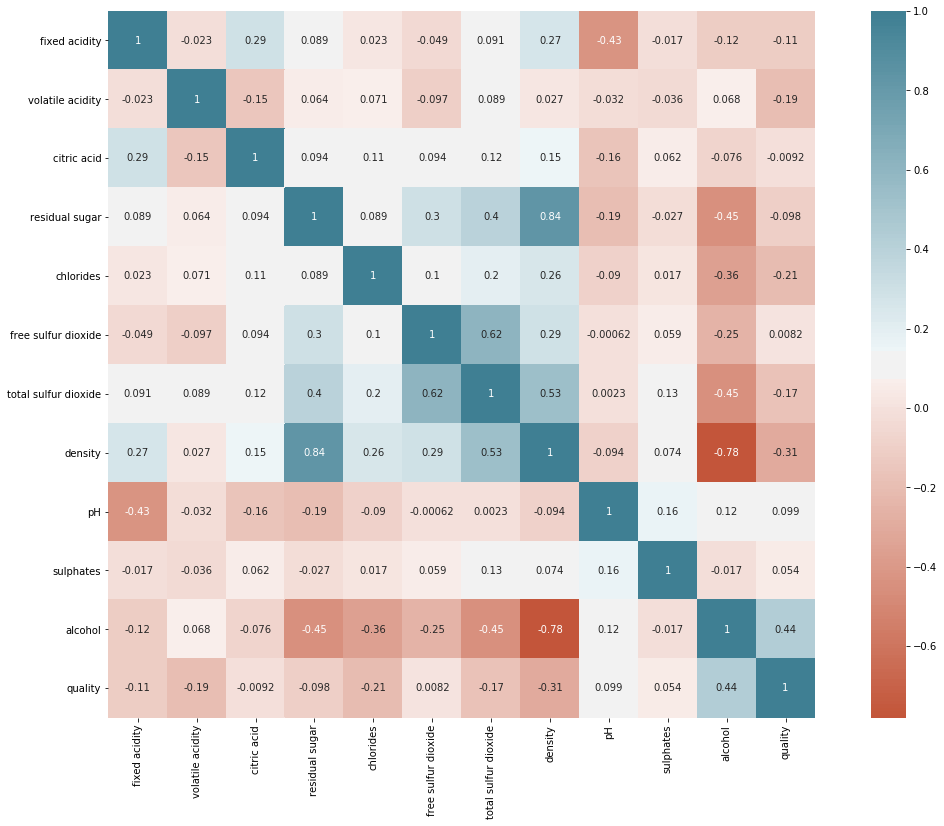

In [10]:
# drop the recommend column
wine_quality_data_1 = wine_quality_data.drop(["recommend"], axis=1)
## correlation between variables
wqd_corr = wine_quality_data_1.corr(method='pearson')
plt.figure(figsize=(20,13))
sns.heatmap(wqd_corr, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)

,Correlation
fixed acidity,-0.113663
volatile acidity,-0.194723
citric acid,-0.009209
residual sugar,-0.097577
chlorides,-0.209934
free sulfur dioxide,0.008158
total sulfur dioxide,-0.174737
density,-0.307123
pH,0.099427
sulphates,0.053678


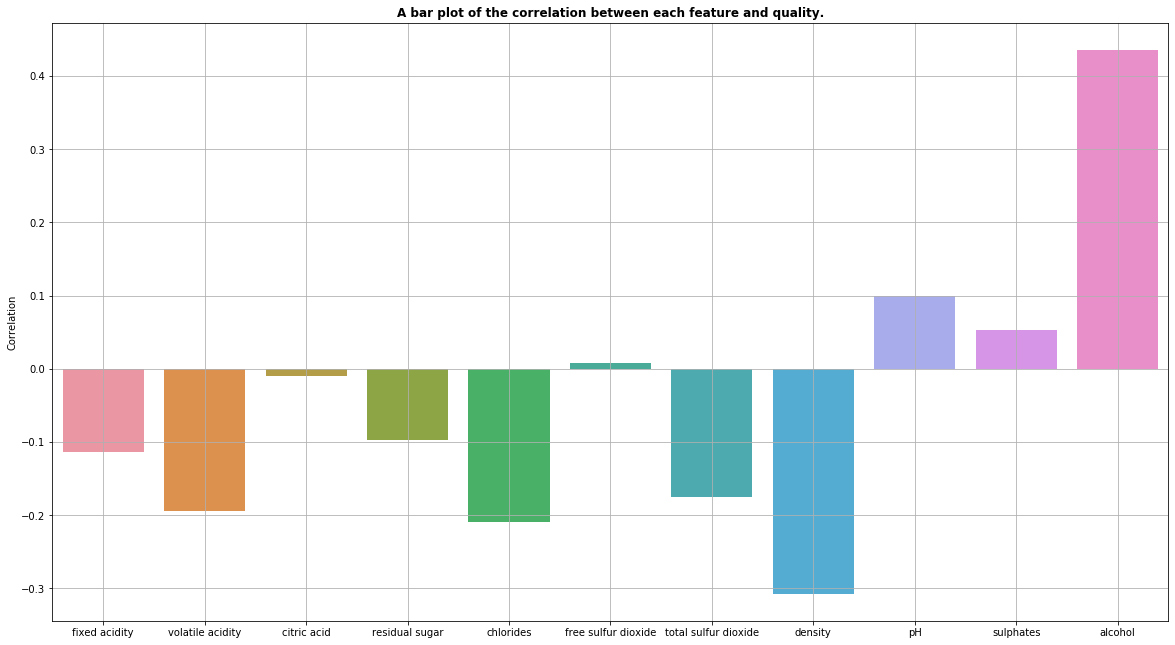

In [11]:
var_tar_corr = pd.DataFrame(wine_quality_data_1[wine_quality_data_1.columns[0:]].corr()['quality'][:])
plt.figure(figsize=(20,11))
var_tar_corr = var_tar_corr.drop(index='quality')
var_tar_corr.columns = ['Correlation']
sns.barplot(var_tar_corr.index, var_tar_corr.Correlation)
plt.grid()
plt.title("A bar plot of the correlation between each feature and quality.", fontweight="bold")
var_tar_corr

From the above correlation heatmap and barplot of the correlations, it is evident that 

* alcohol has the highest positive correlaiton with quality,
* free sulfur dioxide has the least possitive correlation with quality,
* there exist a strong negative correlation between alcohol and density,
* strong positive correlation between density and residual acid.

All these affect the perfomance of the model built with this data. It could be due to collinearity between variables or due to the use of unnecessary variables in building the model. All these will be taken into conderation when improving on the performance of the model.

From the documentaiton provided, the boolean entries of the `recommend` column are a direct effect of the `quality` where a quality value greater than on equal to 7 has a recommend entry of `True` and a value less than 7 has recommend `False`.
* Determine the different unique entries or value ratings of the quality.
* Extract the rows with recommend entry `True`.
* Verify that these rows all have quality greater than or equal to 7.

In [12]:
# get all unique values for the wind quality rating
print(wine_quality_data.quality.unique())
xx = wine_quality_data[wine_quality_data['recommend']==True]
if (xx.quality>=7).all():
    print("Rows with recommend True have quality greater than or equal to 7.")
else:
    print("Check again!")

[6 5 7 8 4 3 9]
Rows with recommend True have quality greater than or equal to 7.


* As earlier mentioned, recommend is a direct function of quality, and since the aim is using recommend to get binary predictions,  quality is dropped from the data set.
* The boolean entries of recommend are mapped to ones and zeros.
* The recommend column entries are then replaced with the ones and zeros.

In [13]:
wine_quality_data_2 = wine_quality_data.drop(["quality"], axis=1)

# One can actually work with the boolean values
# As a matter of fact, working with booleans produce the same results.

lab_encoder = preprocessing.LabelEncoder()
lab_encoder.fit(wine_quality_data_2['recommend'])
recommend = lab_encoder.transform(wine_quality_data_2['recommend'])
wine_quality_data_2['recommend'] =  recommend
wine_quality_data_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


#### Build an SVM model for binary classification.

* Get the explanatory variables into an X matrix.
* Get the response variable label into y.

In [14]:
X = wine_quality_data_2.drop(["recommend"], axis=1)
y = wine_quality_data_2['recommend']
print(y.head())
X.head()


0    0
1    0
2    0
3    0
4    0
Name: recommend, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


##### Train Test slpit the data
* Split the data into the training and testing sets.

**NOTE!**
* There is no rule of thumb for train-test split ratio. This depends very much on the dataset and on the technique to be adopted. It is adviced to have a larger training set. By having a larger training set, your algorithm gets the chance to have a good understanding of the data. With a better understanding of the data, the model has the tendency of making better predictions.

* However, when the proportion of the training set is too high, the model tends to overfit and its performance on unseen data turns to be very poor. 
* In this case, I used different ratios and considered the accuracy of the model in each case. I realized that from a test % of 40 to 20%, the accuracy was increasing with increasing proportion of the testing set. When I increased the training set to 90%, the test accuracy decreased. This was considered to be an indication of overfitting. I decided to keep the 80:20 ratio which gave the highest prediction accuracy.

##### Train the classifier and predict
* Create an instance of the SVC module from SVM package
* Fit the training data into this instance(model).
* Do the predictions with the trained model.
* Evaluate the performacne of the model.

In [15]:

import warnings
warnings.filterwarnings('ignore')

def train_predict(X, y, model, verbose=False):
    """
    Inputs: X the data set of all explanatory variables
            y in the target variable
            model is one of the many machine learning models for binary classification
            which is trained to make predictions for given tasks.
            verbose - this permits you to display the heatmap of the confusion matrix or not.
    Functionality: - The X and y are splitted into the training and testing sets in the 
                     ratio 70:30, 70% for training and 30% foor testing.
                   - The X_train and y_train are then fitted into the adopted model. This 
                     is actually training the model to understand the data set provided. 
                   - The trained model is then used to make predictions and based on these 
                     predictions, the confusion matrix, the prediction accuracy and the prediction
                     probabilities.
                   - It prints the accuracy, the confusion matrix, the recall value and the f1_score.
                   - the heatmap of the confusion matrix is also displayed with this function.
    Outputs: This function returns the X_test, y_yest, y_pred and probs that can be used for further 
             analysis.
    """
    
    #70% training and 30% for testing.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    #train the model with the training data set
    model.fit(X_train, y_train)
    #make predictions of the test data
    y_pred = model.predict(X_test)
    #generate the confusion matrix
    conf_mat =  confusion_matrix(y_test, y_pred)
    #calculate the model prediction accuracy
    acc = accuracy_score(y_test, y_pred)
    #generate the class prediction probabilities for every
    #data point in the testing set.
    probs = model.predict_proba(X_test)
    #print the prediction accuracy
    print("Accuracy Score of the SVM classifier: \n", acc)
    #print the confusion matrix
    print("The confusion Matrix: \n", conf_mat)
    #print the recall
    print("Recall = ", recall_score(y_test, y_pred))
    #print the f1_score for the model
    print("F1_score = ", f1_score(y_test, y_pred))
    #plot the heatmap for the confusio matrix.
    #visuals ease comprehension of information and this justifies why 
    #I want a heatmap to be produced each time this functions is used.
    if verbose:
        plt.figure(figsize=(8,8))
        sns.heatmap(conf_mat, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
    return X_test, y_test, y_pred, probs

Accuracy Score of the SVM classifier: 
 0.7683673469387755
The confusion Matrix: 
 [[753   0]
 [227   0]]
Recall =  0.0
F1_score =  0.0


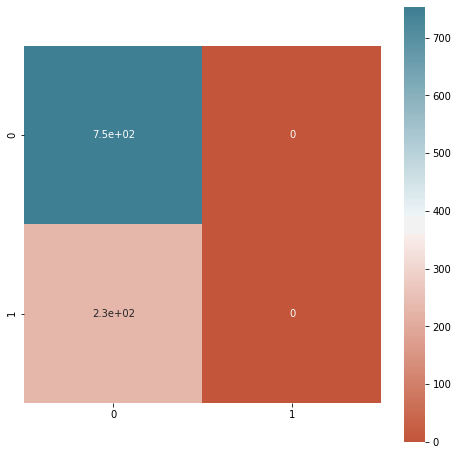

In [16]:

#create an instance of the SVM classifier 
wine_classifier = svm.SVC(probability=True)
xtest, ytest, y_pred, probs = train_predict(X, y, wine_classifier, verbose=True)

***
* Number of True Positives(TP):1141
* Number of False Positives(FP):0
* Number of True Negatives(TN):0
* Number of False Negatives(FN):329
***
##### Observations
* The svm classifier has a performance accuracy of 77.6%. 
* All predictions were in one class(zero), problematic!
* High accuracy and zero values of recall and f1_score communicates the defective nature of the mode. Why?
* Subsequent measures to improve on the performance of this model will take these into consideration.

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_cur(probs, y_test):
    
    """
    Inputs: probs, class prediction probabilities from a model
            y_test is the target variable in the testing set.
    Functionality: - extracts probabilities of getting a 1 from probs
                   - calculates the area under the curve(AUC)
                   - prints the AUC
                   - generate the false positives and true oisitives rates 
                     (FPR and TPR) with the roc_curve function.
                   - plots the graph of TPR against FPR which is the receiver
                     operating characteristics curve.
    Outputs: returns nothing but displays the ROC curve
    """
    probs = probs[:, 1]
    auc = roc_auc_score(y_test, probs)
    print('AUC: %.2f' % auc)
    
    fig, ax = plt.subplots(figsize=(20,13))
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, color='blue',LineWidth = 3, label='ROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("Area Under the Receiver Operating Characteristics Curve,")
    plt.grid()
    plt.legend()
    plt.show()

AUC: 0.78


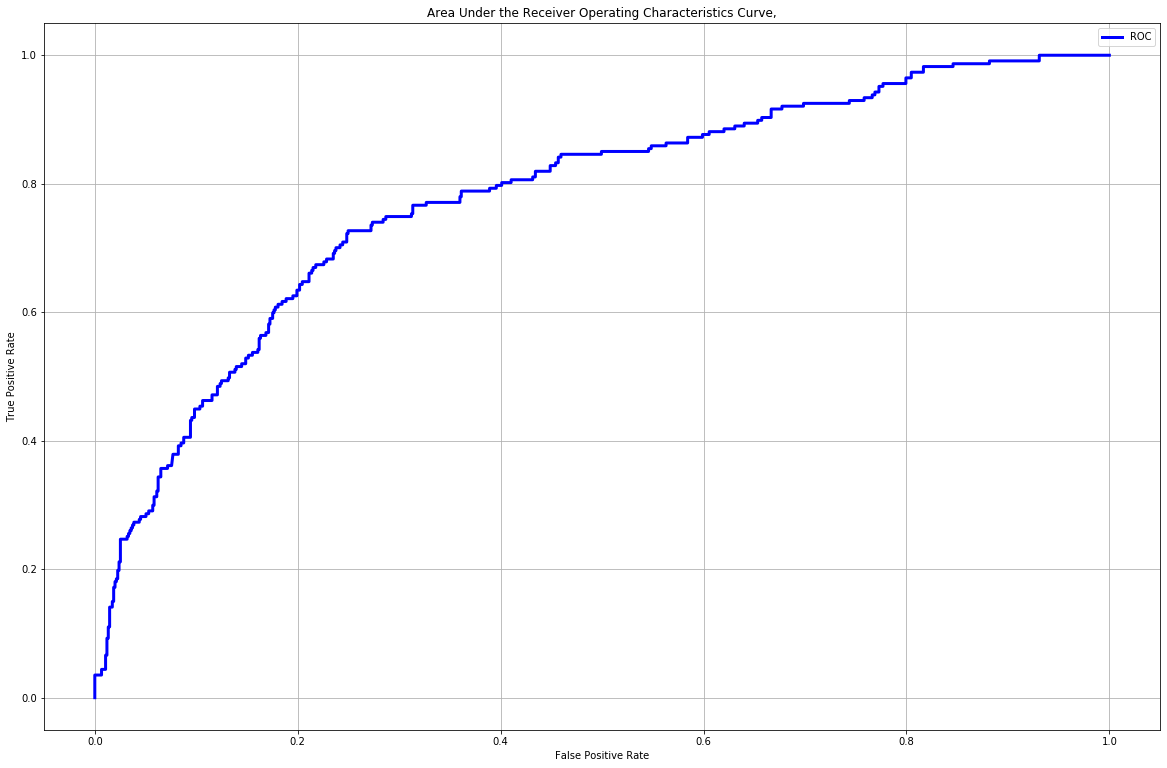

In [18]:

plot_roc_cur(probs, ytest)


The area under the ROC curve is equivalent to the accuracy of the model. It gives an idea of the model's prediction capability. Usually a model with AUC value greater 0.5 is considered a good model. Hence, this model is doing pretty well, however there is still room for improvement.


#### Improving in the perfomance of the model

***
Initially, the SVM classifier used produced an accuracy with a recall and f1_score of zero indicating the poor nature of the model. What could possibly lead to such results? **Imbalance in data set**.

Data imabalance is a situation where the proportion of data for a single class is way more than in another class. In this problem, only 21% of the available data is classified as true. With the larger portion of the data being 0, the probability of always getting a 0 is higher and this is what is reflecting on the model prediction ability.

With this model, the model prediction accuracy is about 77% with all predictions being zeros and the recall and f1_score being zeros. This is a call for concern and this tells how dependency on the model accuracy can be misleading. Thus employing other performance metrics such as f1_score, recall as above can help point situations where the accuracy of the model is not really a reflection of the model's prediction capability.

In this case, imbalance in the data set is probably the reason behind the results of the f1_score and the recall. **How can the problem be solved?**

Several methods are used to adjust the data to mitigate the effect of the imbalance
* Oversampling the of the minority data
* Undersampling of the majority data
* generation of synthetic data points for the minority data etc

Each of these methods have their pros and cons. Here, the generation of synthetic data points is used in this task.
***


In [19]:
##dealing with the imbalance nature of the data
##!pip install imblearn

In [20]:
from imblearn.over_sampling import SMOTE
def SMOTE_resampling(X, y):
    """
    Inputs: X the data set of all explanatory variables
            y in the target variable
            
    Functionality: This function is used when there is imablance in the data set.
                   It uses the SMOTE resampling method to generate synthetic points from the minority
                   class to increase it's cardinality.
    Outputs: The output is a data set(data frame) of explanatory variables and the target variable with increased
             number of data points in the minority class.
    """
    smote = SMOTE(random_state = 42)
    x_resampled, y_resampled = smote.fit_resample(X, y)
    return x_resampled, y_resampled 

In [21]:
x_resampled, y_resampled = SMOTE_resampling(X, y)
xtest, ytest, y_pred, probs = train_predict(x_resampled, y_resampled, wine_classifier)

Accuracy Score of the SVM classifier: 
 0.6927083333333334
The confusion Matrix: 
 [[494 273]
 [199 570]]
Recall =  0.741222366710013
F1_score =  0.7071960297766751


* With the data resampled, we experienc in decrease in the accuracy and a significant increase in the f1_score and recall values. 

To further improve on the model performance, taking a look at the importance of each variable with respect to the target variable is a good start. Forward regression with Ordinary Least Squares is used here to determine the importance of each feature in the data set. This also helps in making the model parsimonious.

In [22]:
#Determine feature importance and do feature selection
import statsmodels.api as sm
def forward_regression(X, y, threshold_in, verbose=False):
    """
    Inputs: X the data set of all explanatory variables
            y in the target variable
            threshold_in represents the maximum value of the p_value
            for a variable to be considered important.
            verbose permits the printing ot the selected variables and their
            corresponding accuracies.
    Functionality: This is forward regression implementation which starts with an empty 
                   set of feautures. The most important feautures are determined using 
                   the ordinary least squares(OLS) regression method. OLS determines the
                   importance of each variable using the principle of least squares. The 
                   OLS calculates the p-valeu and compare with the threshold which is specified.
                   A variable with a p-value lower than the threshold is considered to have a 
                   significant effect on the target variable.
    Outputs: returns a list of the most important feautures in the data set
    """
    included = []
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

In [23]:
#get the list of selected variables
selected_vars = forward_regression(X, y, 0.05, verbose =True)
#get the least of the least important variables that were not selected
not_slected_vars =[var for var in X.columns if var not in selected_vars]
#drop the leasr important variables from the data set
X_new = X.drop(not_slected_vars, axis = 1)
#resample the data with the selected variables
x_resampled, y_resampled = SMOTE_resampling(X_new, y)
#train and predict with the resampled selected features.
xtest, ytest, y_pred, probs = train_predict(x_resampled, y_resampled, wine_classifier)

Add  alcohol                        with p-value 6.0214e-173
Add  volatile acidity               with p-value 1.17822e-12
Add  residual sugar                 with p-value 1.92263e-08
Add  pH                             with p-value 2.30251e-05
Add  density                        with p-value 5.70235e-08
Add  sulphates                      with p-value 7.34746e-07
Add  fixed acidity                  with p-value 4.84188e-06
Add  free sulfur dioxide            with p-value 0.00133055
Accuracy Score of the SVM classifier: 
 0.728515625
The confusion Matrix: 
 [[578 189]
 [228 541]]
Recall =  0.7035110533159948
F1_score =  0.7218145430286859


F1_score is a class-balanced accuracy measure and a higher value indicates the model's ability to indentify true positives. By doing the feature selection, we realize than we obtain a better accuracy and a better f1_score indicating an increase in the model's performance.